# Rede Neural
Nesta tarefa você deve implementar uma rede neural com duas camadas totalmente conectadas. O treinamento e a validação deverão ser executados no CIFAR-10. 


In [1]:
# Configuração inicial

import numpy as np
import matplotlib.pyplot as plt

from rncvc.classifiers.neural_net3L import NeuralNet3L

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Permite a recarga automática de arquivos python importados
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ retorna erro relativo """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Implemente a rede neural na classe `NeuralNet` no arquivo `rncvc/classifiers/neural_net.py`. Os parâmetros (pesos) da rede são armazenados na variável (dicionário) `self.params`, onde as chaves são os nomes (string) das camadas e os valores são numpy arrays com os pesos. A seguir, inicializamos dados sintéticos e uma rede simplificada para guiar o procedimento de desenvolvimento. 

In [2]:
# Criação de um modelo e um conjunto de dados para alguns testes.
# Definimos um seed para que seja possivel a conferência dos resultados.

input_size = 4
hidden_size = 10
hidden_size2 = 15
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return NeuralNet3L(input_size, hidden_size, hidden_size2, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

W1: (4L, 10L)
b1: (10L,)
W2: (10L, 15L)
b2: (15L,)
W3: (15L, 3L)
b3: (3L,)


# Forward: calcule valores de predição para as classes
A função `NeuralNet.loss` utiliza os dados e os parâmetros para calcular as predições para cada classe. Além disso, são calculados: o valor da função de custo e os gradientes dos parâmetros. 

Implemente a primeira parte, que faz a predição das classes. 

In [3]:
scores = net.loss(X, reg=0.1)
print 'Suas predicoes:'
print scores.shape
print scores


Suas predicoes:
(5L, 3L)
[[-0.12143288  0.13845538 -0.1111609 ]
 [-0.36797031  0.28168056 -0.18445697]
 [-0.44938763  0.23235063 -0.20434098]
 [-0.16901828  0.12397267 -0.08396804]
 [-0.00878972  0.00958007  0.01437574]]


# Forward: calcule a função de custo

Na mesma função, implemente a segunda parte, calculando os valores da função de custo.

In [4]:
loss, _ = net.loss(X, y, reg=0.1)

print loss

1.19699695429


# Backward

Implemente o restante da função. Aqui os gradientes com respeito às variáveis `W1`, `b1`, `W2`, e `b2` devem ser calculados. 
Com uma implementação correta de todo o processo de backward você deve ser capaz de conferir utilizando o gradiente numérico.

In [5]:
from rncvc.gradient_check import eval_numerical_gradient

# Use o gradiente numérico para verificar sua implementação da etapa backward.
# Se sua implementação estiver correta, a diferença entre os gradientes será 
# inferior a 1e-8 para cada um das camadas de pesos: W1, W2, b1, b2.

loss, grads = net.loss(X, y, reg=0.1)

# as diferenças devem ser pequenas (<1e-8)
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print '%s erro relativo max: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

b2 erro relativo max: 5.135895e-09
W3 erro relativo max: 1.273393e-07
b1 erro relativo max: 2.747558e-09
W1 erro relativo max: 3.561318e-09
b3 erro relativo max: 4.612931e-10
W2 erro relativo max: 3.440708e-09


# Treinando a rede (modelo toy)

Para treinar, utilize o SGD. Preencha os espaços em branco da função NeuralNet.train. Ainda, você precisa implementar a função NeuralNet.predict utilizada para verificar acurácia durante o treinamento. 

Com a implementação completa, executando o código abaixo, você deve ser capaz de obter o valor da função de custo próximo a 0.2.


W1: (4L, 10L)
b1: (10L,)
W2: (10L, 15L)
b2: (15L,)
W3: (15L, 3L)
b3: (3L,)
Loss de treinamento:  0.270682190091


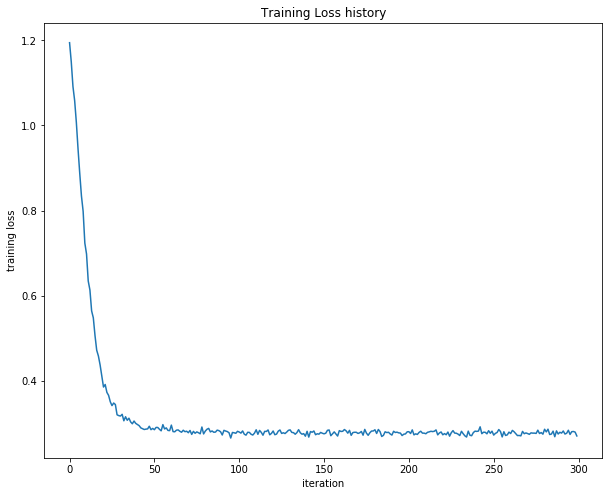

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=0.1,
            num_iters=300, verbose=False)

print 'Loss de treinamento: ', stats['loss_history'][-1]

# plotagem dos valores de custo durante o treinamento
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Carregando o CIFAR-10
Com sua implementação completa (e correta), podemos carregar os dados do CIFAR-10 e usá-los para treinar um modelo de rede neuralem dados reais.  


In [7]:
from rncvc.data_utils import load_CIFAR10, save_model, load_model

def get_CIFAR10_data():
    """
    Carregando o CIFAR-10 e efetuando pré-processamento para preparar os dados
    para entrada na Rede Neural.     
    """
    # Carrega o CIFAR-10
    cifar10_dir = 'rncvc/datasets/cifar-10-batches-py'    
    X_train, y_train, X_valid, y_valid = load_CIFAR10(cifar10_dir)   

    # Normalizacao dos dados: subtracao da imagem media
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_valid -= mean_image
    
    print X_train.shape
    print X_valid.shape
    
    # Imagens para linhas 
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_valid = X_valid.reshape(X_valid.shape[0], -1)    

    return X_train, y_train, X_valid, y_valid


# Utiliza a funcao acima pra carregar os dados.
X_train, y_train, X_valid, y_valid = get_CIFAR10_data()
print 'Shape dados treinamento: ', X_train.shape
print 'Shape das classes (treinamento): ', y_train.shape
print 'Shape dados validacao: ', X_valid.shape
print 'Shape das classes (validacao): ', y_valid.shape

(40000L, 32L, 32L, 3L)
(10000L, 32L, 32L, 3L)
Shape dados treinamento:  (40000L, 3072L)
Shape das classes (treinamento):  (40000L,)
Shape dados validacao:  (10000L, 3072L)
Shape das classes (validacao):  (10000L,)


# Treinando a Rede no CIFAR-10
Para treinar a rede use SGD com momentum. Salve o melhor modelo com a função data_utils.save_model().

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 300
hidden_size2 = 300
num_classes = 10
net = NeuralNet3L(input_size, hidden_size, hidden_size2, num_classes)

# Treina a rede
#stats = net.train(X_train, y_train, X_valid, y_valid,
#            num_iters=1000, batch_size=200,
#            learning_rate=1e-2, learning_rate_decay=0.95,
#            reg=0.5, verbose=True)

stats = net.trainMarcelo(X_train, y_train, X_valid, y_valid,
                                    epochs=200,
                                    batch_size=200,
                                    learning_rate=5e-3, 
                                    learning_rate_decay=0.95,
                                    reg=0.35, 
                                    verbose=True, 
                                    earlyStopping=15,
                                    optimizer="AdaGrad",
                                    dropout=0.5)


# Efetua predicao no conjunto de validacao
val_acc = (net.predict(X_valid) == y_valid).mean()
print 'Acuracia de validacao: ', val_acc

# Salva o modelo da rede treinada
model_path = 'model.pickle'
save_model(model_path, net.params)



W1: (3072L, 300L)
b1: (300L,)
W2: (300L, 300L)
b2: (300L,)
W3: (300L, 10L)
b3: (10L,)
Epoch 0 -> loss 2.107225 acc 0.355000 val_loss 2.074839 val_acc 0.301200  LossVal LossTrain AccVal
Epoch 1 -> loss 1.974566 acc 0.425000 val_loss 2.023788 val_acc 0.293300  LossVal LossTrain
Epoch 2 -> loss 2.119161 acc 0.330000 val_loss 1.995564 val_acc 0.315200  LossVal AccVal
Epoch 3 -> loss 2.056534 acc 0.360000 val_loss 1.995521 val_acc 0.315600  LossVal AccVal
Epoch 4 -> loss 1.946323 acc 0.380000 val_loss 1.952216 val_acc 0.321100  LossVal LossTrain AccVal
Epoch 5 -> loss 1.949078 acc 0.435000 val_loss 1.981534 val_acc 0.319400 
Epoch 6 -> loss 1.939759 acc 0.400000 val_loss 1.939011 val_acc 0.341500  LossVal LossTrain AccVal
Epoch 7 -> loss 2.023271 acc 0.415000 val_loss 1.950573 val_acc 0.335500 
Epoch 8 -> loss 1.929345 acc 0.440000 val_loss 1.955712 val_acc 0.326900  LossTrain
Epoch 9 -> loss 1.989833 acc 0.375000 val_loss 1.908785 val_acc 0.347000  LossVal AccVal
Epoch 10 -> loss 1.991117 

# Acompanhando o treinamento

Com os hiperparâmetros definidos anteriormente você provavelmente não obterá bons resultados: a acurácia não deve passar de 30%. 

Uma estratégia para entender o que não está bom durante o treinamento é plotar os valores da função de custo e acurácia durante o treinamento. 

Outra estratégia é visualizar os pesos aprendidos na primeira camada durante o processo de otimização. Normalmente, redes treinadas em dados visuais apresentam padrões estruturais visíveis na primeira camada.


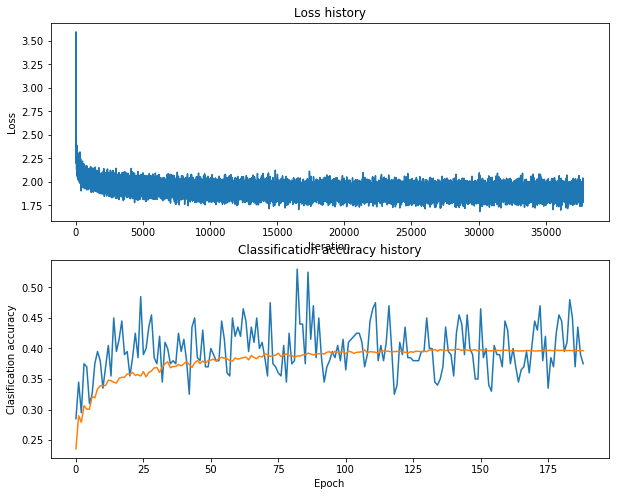

In [63]:
# Plota a função de custo e acurácia
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [ ]:
from rncvc.vis_utils import visualize_grid

# Visualiza os pesos da rede

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()
    
#def show_net_weights2(net):
#    W1 = net.params['W1']
#    W2 = net.params['W2']
#    print W1.shape
#    print W1.reshape(32, 32, 3, -1).shape
#    print W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2).shape
    
#    print W2.shape
#    print W2.transpose(1,0).shape
#    print W2.transpose(1,0).reshape(50,10,10,-3).shape
    
#    W2 = W2.transpose(1,0).reshape(50,10,10)
#    plt.imshow(W2[10])
    #plt.imshow(visualize_grid(W2, padding=3).astype('uint8'))
#    plt.gca().axis('off')
#    plt.show()    

show_net_weights(net)
#show_net_weights2(net)

# Desafio RNCVC 2017

**Dicas**
* Tune os hiperparâmetros (taxa de aprendizado, número de neurônios, etc). 
* Regularize o modelo: teste o uso de Regularização L2 e Dropout. 
* Use validação cruzada para achar os melhores hiperparâmetros.
* Utilize um esquema mais sofisticado de atualização dos pesos (ex: SGD + Momentum, Nesterov, Adadelta, Adam, RMSProp).
* Teste funções de ativação (ex: ELU, Leaky ReLU) e Batch Normalization. 
* Salve o melhor modelo obtido usando data_utils.save_model() e data_utils.load_model() para abrir.
* O campeão do ano passado conseguiu 62% de acurácia! 


Para o desafio: é <b>fundamental</b> que o trecho abaixo seja executado sem problemas. 


In [ ]:
# Assuma que o modelo são os pesos serializados em disco usando data_utils.save_model()

input_size = 32 * 32 * 3
hidden_size = 800
num_classes = 10
net = NeuralNet(input_size, hidden_size, num_classes)

best_model = 'model_0.575500_3200_0.750000_0.002000_135.pickle'
model = load_model(best_model)
net.params = model

# Retorna um vetor de predição (N x 1), onde N é o número de instâncias
# As classes retornadas aqui devem ser inteiros: [0, 1, 2, ..., C]
# Assuma que X_teste e uma matriz de instancias (N_test, D) 
# Voce nao tera o X_teste oficial, use outro conjunto para validar.

train_predicted = net.predict(X_train)
valid_predicted = net.predict(X_valid)


Reporte abaixo os valores de acurácia no treino e validação do modelo enviado para o desafio.

In [ ]:
# Treino: 00.00%
# Validacao: 00.00%

print 'Treino: ', (train_predicted == y_train).mean(), "%"
print 'Validacao: ', (valid_predicted == y_valid).mean(), "%"